In [1]:
import sys
print(sys.executable)
import pandas as pd
df = pd.read_csv("sales_prediction.csv")

/Users/srimedha/testsite/sales/myenv/bin/python


In [2]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
X=df.drop(columns=['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

SEED=42

In [4]:
import sys
print(sys.executable)

from sklearn.model_selection import train_test_split

# Assuming X and y are defined somewhere in your script
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
print(X_train.shape, X_test.shape)


/Users/srimedha/testsite/sales/myenv/bin/python
(5966, 11) (2557, 11)


In [5]:
X_train.head(3)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
y_train.head(3)

1921     117.8466
655     1230.3984
2229    4933.5780
Name: Item_Outlet_Sales, dtype: float64

In [7]:
X_train_c=X_train.copy()

In [8]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [9]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
num_data=X_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [11]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [12]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Item_Weight'>

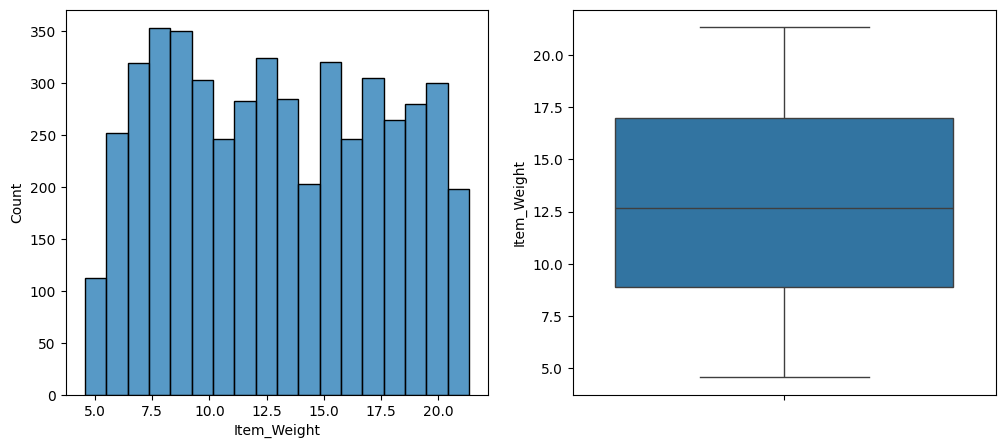

In [14]:
fig,ax=plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=X_train_c,x='Item_Weight',ax=ax[0]);
sns.boxplot(data=X_train_c,y='Item_Weight',ax=ax[1])

In [15]:
def visualize_numeric_feature(data_frame,col_name):
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    sns.histplot(data=data_frame,x=col_name,ax=ax[0])
    sns.boxplot(data=data_frame,y=col_name,ax=ax[1])

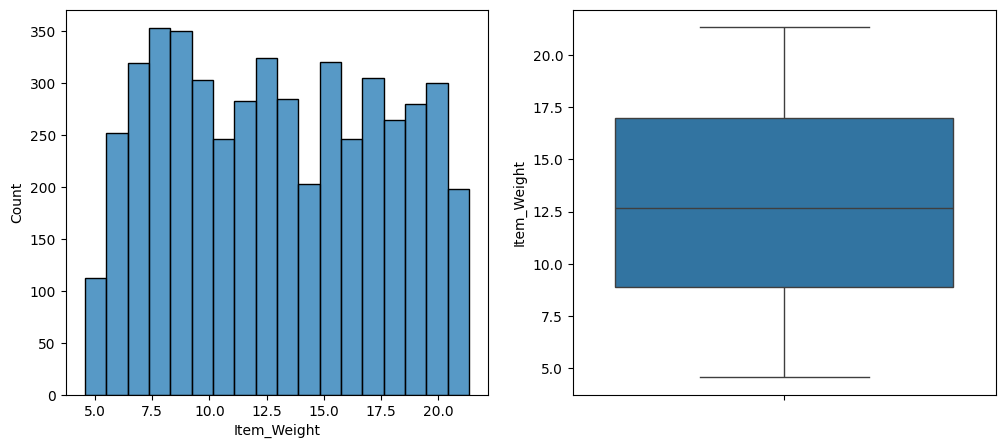

In [16]:
visualize_numeric_feature(X_train_c,'Item_Weight')

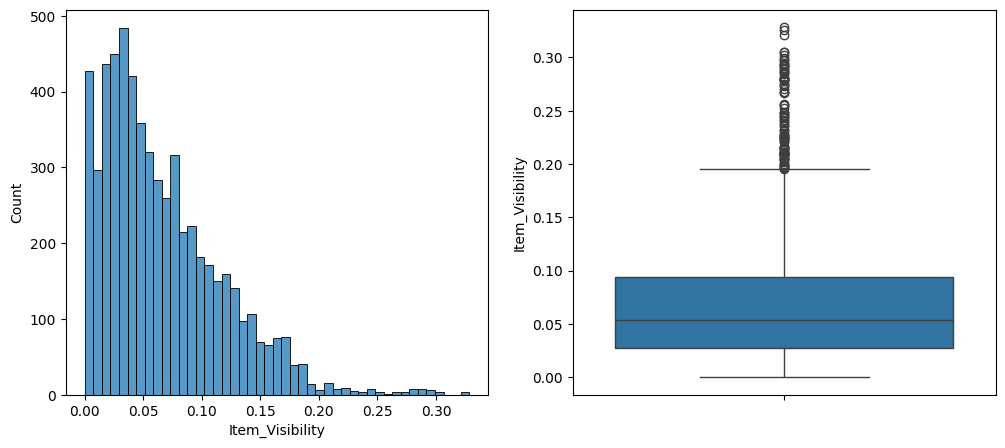

In [17]:
visualize_numeric_feature(X_train_c,'Item_Visibility')

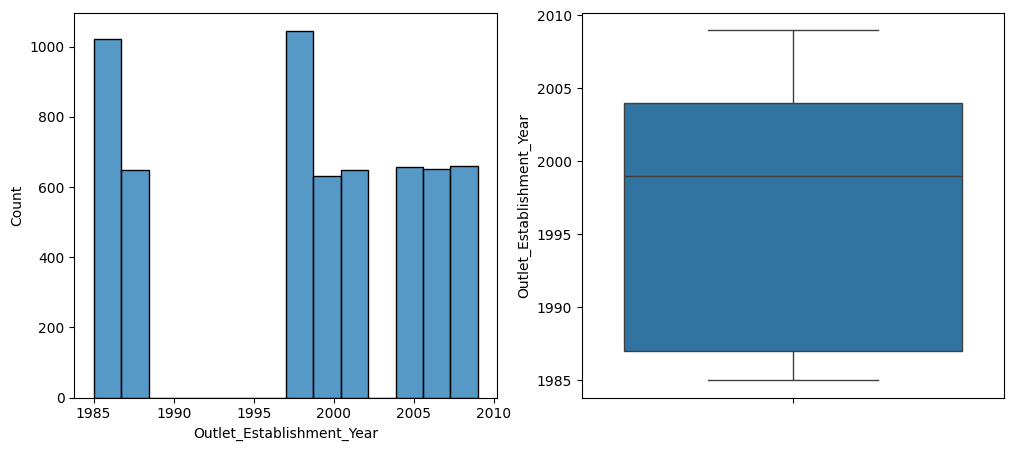

In [18]:
visualize_numeric_feature(X_train_c,"Outlet_Establishment_Year")

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

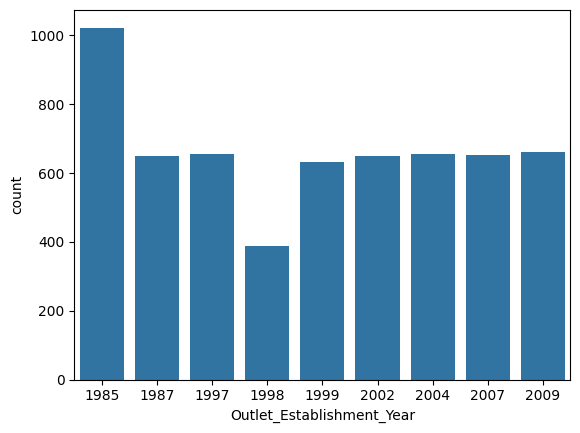

In [19]:
sns.countplot(data=X_train_c,x='Outlet_Establishment_Year')

In [20]:
cat_features=X_train_c.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [21]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [22]:
cat_features['Item_Identifier'].value_counts()

Item_Identifier
NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: count, Length: 1543, dtype: int64

In [23]:
cat_features['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [24]:
cat_features['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: count, dtype: int64

In [25]:
cat_features['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: count, dtype: int64

In [26]:
cat_features['Outlet_Size'].value_counts()

Outlet_Size
Medium    1960
Small     1667
High       649
Name: count, dtype: int64

In [27]:
cat_features['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: count, dtype: int64

In [28]:
cat_features['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: count, dtype: int64

In [29]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [30]:
X_train_c['Item_Identifier'].str[:2].value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [31]:
def create_item_type(data_frame):
    data_frame['Item_Type']=data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type']=data_frame['Item_Type'].map({
                                            'FD':'Food',
                                            'NC':'Non_Consumable',
                                            'DR':'Drink'
                            })
    return data_frame

In [32]:
X_train_c=create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [33]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [34]:
X_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [35]:
X_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index()
#ITEM_ID_WEIGHT_MAPPING=dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
#list(ITEM_ID_WEIGHT_PIVOT.items())[:10]

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1517,NCZ30,6.590
1518,NCZ41,19.850
1519,NCZ42,10.500
1520,NCZ53,9.600


In [36]:
ITEM_ID_WEIGHT_PIVOT=X_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING=dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'],ITEM_ID_WEIGHT_PIVOT['Item_Weight' ]))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [37]:
ITEM_ID_WEIGHT_PIVOT=X_train_c.pivot_table(values='Item_Weight',index='Item_Type',
                                           aggfunc='median').reset_index()
ITEM_ID_WEIGHT_MAPPING=dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Type'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
ITEM_ID_WEIGHT_MAPPING.items()

dict_items([('Drink', 11.8), ('Food', 12.8), ('Non_Consumable', 13.05)])

In [38]:
def impute_item_weight(data_frame):
    data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
    
    data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_ID_WEIGHT_MAPPING))
    
    return data_frame


In [39]:
X_train_c=impute_item_weight(X_train_c)

In [40]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [41]:
X_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [42]:
import pandas as pd
X_train_c.pivot_table(values='Outlet_Size', index='Outlet_Type',
                      aggfunc=(lambda x: x.mode()[0])).reset_index()


,Outlet_Type,Outlet_Size
0,Grocery Store,Small
1,Supermarket Type1,Small
2,Supermarket Type2,Medium
3,Supermarket Type3,Medium


In [43]:
import pandas as pd

OUTLET_TYPE_SIZE_PIVOT=X_train_c.pivot_table(values='Outlet_Size',index='Outlet_Type',
                                             aggfunc=(lambda x: x.mode()[0])).reset_index()
OUTLET_TYPE_SIZE_MAPPING=dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'],OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING.items()

dict_items([('Grocery Store', 'Small'), ('Supermarket Type1', 'Small'), ('Supermarket Type2', 'Medium'), ('Supermarket Type3', 'Medium')])

In [44]:
def impute_outlet_size(data_frame):
    data_frame.loc[:,'Outlet_Size']=data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))
    return data_frame

In [45]:
X_train_c=impute_outlet_size(X_train_c)

In [46]:
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [47]:
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [48]:
def standardize_item_fat_content(data_frame):
    data_frame['Item_Fat_Content']=data_frame['Item_Fat_Content'].replace({
        'Low Fat':'Low_Fat',
        'LF' :'Low_Fat',
        'reg':'Regular',
        'low fat':'Low_Fat'
    })
    return data_frame

In [49]:
X_train_c=standardize_item_fat_content(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    3860
Regular    2106
Name: count, dtype: int64

In [50]:
X_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non_Consumable  Low_Fat             1137
dtype: int64

In [51]:
X_train_c.loc[X_train_c['Item_Type']=='Non_Consumables','Item_Fat_Content']  

Series([], Name: Item_Fat_Content, dtype: object)

In [52]:
def corect_item_fat_content(data_frame):
    data_frame.loc[data_frame['Item_Type']=='Non_Consumables','Item_Fat_Content']='Non_Edible'
    return data_frame


In [53]:
X_train_c=corect_item_fat_content(X_train_c)
X_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non_Consumable  Low_Fat             1137
dtype: int64

In [54]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [55]:
def prepare_dataset(data_frame):
    data_frame=create_item_type(data_frame)
    data_frame=impute_item_weight(data_frame)
    data_frame=standardize_item_fat_content(data_frame)
    data_frame=corect_item_fat_content(data_frame)
    
    return data_frame

In [56]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [57]:
X_train=prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [58]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [59]:
X_test=prepare_dataset(X_test)
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [60]:
cat_feats=X_train.select_dtypes(include=['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low_Fat,Non_Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [61]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [62]:
ohe_feature_names=ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [63]:
num_feats_train=X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,12.80,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [64]:
cat_feats_train=X_train.select_dtypes(include=['object'])
X_train_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [65]:
X_train_final=pd.concat([num_feats_train,X_train_cat_ohe],axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.80,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [66]:
final_columns=X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [67]:
num_feats_test=X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train=X_test.select_dtypes(include=['object'])
X_test_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_feature_names)
X_test_final=pd.concat([num_feats_test,X_test_cat_ohe],axis=1)
X_test_final=X_test_final[final_columns]

X_test_final.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,11.800,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

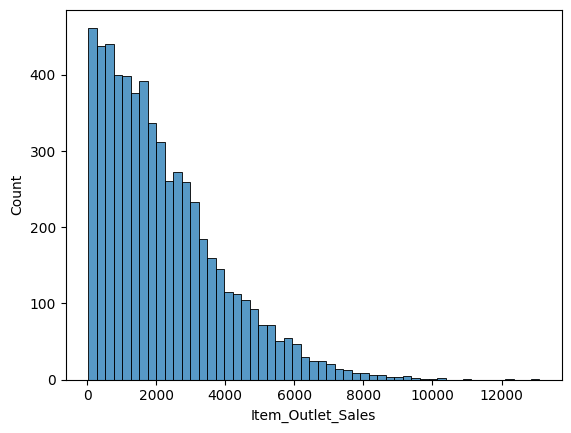

In [68]:
sns.histplot(y_train)

In [69]:
import sys
print(sys.executable)


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,  HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

/Users/srimedha/testsite/sales/myenv/bin/python


In [70]:
import sys
print(sys.executable)


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,  HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

/Users/srimedha/testsite/sales/myenv/bin/python


In [71]:
import sys
print(sys.executable)


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,  HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

/Users/srimedha/testsite/sales/myenv/bin/python


In [72]:
import sys
print(sys.executable)


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,  HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

/Users/srimedha/testsite/sales/myenv/bin/python


In [73]:
def train_and_eval_model(model,X_train,y_train,cv=5):
    cv_results=cross_validate(model,X_train,y_train,cv=cv,scoring=('r2','neg_root_mean_squared_error'),)
    print('Model:',model)
    r2_scores=cv_results['test_r2']
    print('R2 CV scores:',r2_scores)
    print('R2 CV scores mean / stdev:',np.mean(r2_scores),'/',np.std(r2_scores))
    
    rmse_scores=cv_results['test_neg_root_mean_squared_error']
    rmse_scores=[-1*score for score in rmse_scores]
    print('RMSE CV SCORES:',rmse_scores)
    print('RMSE CV scores mean /stdev:', np.mean(rmse_scores),'/',np.std(rmse_scores))
    

In [74]:
rf=RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf,X_train=X_train_final,y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.57529559 0.53301982 0.54680282 0.5582721  0.52513899]
R2 CV scores mean / stdev: 0.5477058625332443 / 0.01788070064856626
RMSE CV SCORES: [np.float64(1098.0232459025437), np.float64(1160.7862233726544), np.float64(1175.4390507379294), np.float64(1149.1720145938962), np.float64(1195.8523074291347)]
RMSE CV scores mean /stdev: 1155.8545684072317 / 32.85364723689899


In [75]:
gb=GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_final,y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60600621 0.59226356 0.57564042 0.60881697 0.55167386]
R2 CV scores mean / stdev: 0.5868802022348361 / 0.02117463193958826
RMSE CV SCORES: [np.float64(1057.5790484844904), np.float64(1084.6579078016819), np.float64(1137.4269668520856), np.float64(1081.4280480218324), np.float64(1161.9603764938652)]
RMSE CV scores mean /stdev: 1104.6104695307909 / 38.7644638227311


In [76]:
hgb=HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,X_train=X_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.5900365  0.55174123 0.5555105  0.58279065 0.54939271]
R2 CV scores mean / stdev: 0.565894320092996 / 0.01702214848787911
RMSE CV SCORES: [np.float64(1078.799511727286), np.float64(1137.2800454113512), np.float64(1164.0918993123166), np.float64(1116.8237490122665), np.float64(1164.9127388227973)]
RMSE CV scores mean /stdev: 1132.3815888572035 / 32.25182089139657


In [77]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.58605049 0.55838048 0.54929586 0.57829866 0.53031769]
R2 CV scores mean / stdev: 0.5604686372233029 / 0.020052987671590777
RMSE CV SCORES: [np.float64(1084.0313264496144), np.float64(1128.8263826942732), np.float64(1172.20154252389

In [78]:
lgbr=LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_final,y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

In [79]:
X_train_copy=X_train.copy().drop(columns='Item_Identifier')

cat_cols=X_train_copy.select_dtypes(include=['object']).columns.tolist()
num_cols=cal_cols=X_train_copy.select_dtypes(exclude=['object']).columns.tolist()

cat_cols,num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [80]:
X_train_copy[cat_cols]=X_train_copy[cat_cols].astype('category')
n_categorical_features=len(cat_cols)
n_numerical_features=len(num_cols)
X_train_copy=X_train_copy[cat_cols+num_cols]

X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                4276 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [81]:
categorical_mask=[True]*n_categorical_features+[False]*n_numerical_features
categorical_mask

[True, True, True, True, True, True, False, False, False, False]

In [82]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

categorical_mask=[True]*n_categorical_features+[False]*n_numerical_features

ordinal_encoder=make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=np.nan),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hgb=make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=42,categorical_features=categorical_mask
    ),
)
train_and_eval_model(model=hgb,X_train=X_train_copy,y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1314efe60>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                            

In [83]:
lgbr=LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_copy,y_train=y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 10
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 10
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

In [84]:
X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier']).head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,Regular,Food,OUT010,NaN,Tier 3,Grocery Store
655,Low_Fat,Non_Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,Low_Fat,Food,OUT045,NaN,Tier 2,Supermarket Type1
3528,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [85]:
cat_feats=X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names=ohe.get_feature_names_out(input_features=cat_feats.columns)

In [86]:
num_feats_train=X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train=X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_feature_names)
X_train_final=pd.concat([num_feats_train,X_train_cat_ohe],axis=1)

X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_Consumable,Outlet_Identifier_OUT010,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.80,0.054221,129.1310,1985,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [87]:
X_train_final.shape

(5966, 30)

In [88]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

# Imputer for filling NaNs
imputer = SimpleImputer(strategy='mean')

# Pipeline with imputer and model
gb_pipeline = make_pipeline(
    imputer,
    GradientBoostingRegressor(random_state=SEED)
)

# Train and evaluate model
train_and_eval_model(model=gb_pipeline, X_train=X_train_final, y_train=y_train)


Model: Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])
R2 CV scores: [0.6066186  0.58549227 0.58307023 0.62231777 0.57424386]
R2 CV scores mean / stdev: 0.5943485479143238 / 0.017565104588787395
RMSE CV SCORES: [np.float64(1056.7568117114693), np.float64(1093.627287282664), np.float64(1127.4257949641496), np.float64(1062.6026579380966), np.float64(1132.334527978081)]
RMSE CV scores mean /stdev: 1094.5494159748919 / 31.49062588116375


In [89]:
hgb=HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,X_train=X_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.5900365  0.55174123 0.5555105  0.58279065 0.54939271]
R2 CV scores mean / stdev: 0.565894320092996 / 0.01702214848787911
RMSE CV SCORES: [np.float64(1078.799511727286), np.float64(1137.2800454113512), np.float64(1164.0918993123166), np.float64(1116.8237490122665), np.float64(1164.9127388227973)]
RMSE CV scores mean /stdev: 1132.3815888572035 / 32.25182089139657


In [90]:
xgr=xgb.XGBRegressor(random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.52202803 0.49003233 0.47959032 0.5064723  0.46431627]
R2 CV scores mean / stdev: 0.4924878501572142 / 0.0201702775870435
RMSE CV SCORES: [np.float64(1164.848281871559), np.float64(1213.0378236346623), np.float64(1259.5899878777632)

In [91]:
lgbr=LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_final,y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

In [92]:
#Handling Categorical Data expt4 item identifier-feature hashed,rest categorical-one hot encoded
X_train['Item_Identifier'].head()

1921    FDN08
655     NCJ42
2229    FDY47
2537    FDN45
3528    FDY16
Name: Item_Identifier, dtype: object

In [93]:
from sklearn.feature_extraction import FeatureHasher

hash_vector_size=50
fh=FeatureHasher(n_features=hash_vector_size,input_type='string')
item_identifiers = X_train['Item_Identifier'].astype(str).tolist()
item_identifiers = [[identifier] for identifier in item_identifiers]
hashed_features = fh.transform(item_identifiers).toarray()
hashed_df = pd.DataFrame(hashed_features, columns=['H' + str(i) for i in range(hash_vector_size)])
hashed_df.head()

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
cat_feats=X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names=ohe.get_feature_names_out(input_features=cat_feats.columns)

In [95]:
num_feats_train=X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train=X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_feature_names)
X_train_final=pd.concat([num_feats_train,hashed_df,X_train_cat_ohe],axis=1)

X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.80,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [96]:
gb=GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_final,y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60210244 0.58432223 0.57345491 0.6196277  0.56060225]
R2 CV scores mean / stdev: 0.5880219048176167 / 0.020856221499429447
RMSE CV SCORES: [np.float64(1062.8054873174756), np.float64(1095.169701516107), np.float64(1140.3521552155885), np.float64(1066.3801870701097), np.float64(1150.3320091306134)]
RMSE CV scores mean /stdev: 1103.0079080499786 / 36.47855643540804


In [97]:
xgr=xgb.XGBRegressor(random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.53862778 0.50347407 0.47927722 0.53255701 0.4560583 ]
R2 CV scores mean / stdev: 0.5019988744440573 / 0.03131920175285276
RMSE CV SCORES: [np.float64(1144.4422180469096), np.float64(1196.944434394252), np.float64(1259.9688379611734

In [98]:
X_test.shape

(2557, 11)

In [99]:
# Ensure you have X_test loaded similarly to X_train
# Convert the 'Item_Identifier' column to a list of lists
item_identifiers_test = X_test['Item_Identifier'].astype(str).tolist()
item_identifiers_test = [[identifier] for identifier in item_identifiers_test]

# Apply FeatureHasher and convert to DataFrame
hashed_test_features = fh.transform(item_identifiers_test).toarray()
hashed_test_df = pd.DataFrame(hashed_test_features, columns=['H' + str(i) for i in range(hash_vector_size)])

# Select numerical features and reset index
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)

# Select categorical features excluding 'Item_Identifier'
cat_feats_test = X_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])

# Apply OneHotEncoder on categorical features
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)

# Combine numerical features, hashed features, and one-hot encoded features
X_test_final = pd.concat([num_feats_test, hashed_test_df, X_test_cat_ohe], axis=1)

# Display the first few rows of the final test DataFrame
X_test_final.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,11.800,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [100]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
xgr.fit(X_train_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [101]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred=xgr.predict(X_test_final)
print('r2 score: ',r2_score(y_test,y_pred))
print('rmse score: ',mean_squared_error(y_test,y_pred,squared=False))


r2 score:  0.5415112119835852
rmse score:  1133.2361305578665


/Users/srimedha/testsite/sales/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


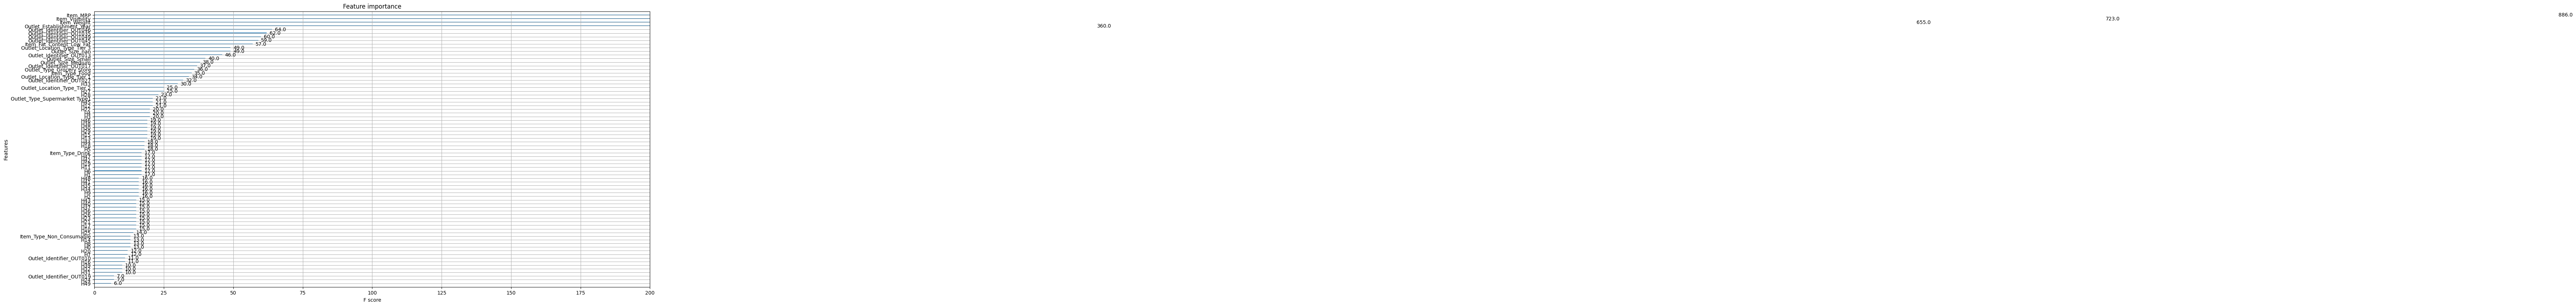

In [102]:
from xgboost import plot_importance

fig, ax=plt.subplots(1,1,figsize=(20,10))
plot_importance(xgr,ax=ax)
ax.set_xlim(left=0, right=200)

plt.show()